    🚗Insurance Fraud Claim Prediction

Insurance fraud is a critical issue that affects the financial stability of insurance companies and leads to increased premiums for policyholders. Detecting fraudulent claims is vital for reducing losses and ensuring fair treatment of all customers. In this project, we aim to develop a machine learning model to identify fraudulent insurance claims.

Objectives

1. Data Preprocessing: Clean and preprocess the dataset to handle any inconsistencies and prepare it for analysis.
    
2. Exploratory Data Analysis (EDA): Perform EDA to understand the distribution and characteristics of the data.
    
3. Class Imbalance Handling: Address class imbalance using techniques such as Synthetic Minority Oversampling Technique (SMOTE).
    
4. Model Training: Train machine learning models to classify insurance claims as fraudulent or non-fraudulent.
    
5. Model Evaluation: Evaluate the performance of the trained models using appropriate metrics.

Dataset

The dataset used in this project consists of various features related to insurance claims, such as:

- Age: Age of the claimant.
- AgeOfPolicyHolder: Age of the policyholder.
- Sex: Gender of the claimant.
- VehiclePrice: Price of the vehicle.
- PolicyType: Type of the insurance policy.
- BasePolicy: Base policy information.
- Make: Make of the vehicle.
- Month: Month when the claim was made.
- MonthClaimed: Month when the claim was filed.
- FraudFound_P: Target variable indicating whether the claim is fraudulent (1) or not (0).

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from keras.callbacks import EarlyStopping

📊01. Descriptive Analysis📊

In [2]:
data = pd.read_csv('insurance_fraud_dataset/fraud_oracle.csv')
data.shape

(15420, 33)

In [3]:
# Display the first few rows
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
# Check for missing values
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

- There is no missing value.

🔎02. Exploratory Data Analysis (EDA)🔎

In [6]:
data.shape

(15420, 33)

- Target Variable Balance - Fraud_Found_P

In [7]:
fraud_counts = data['FraudFound_P'].value_counts().reset_index()
fraud_counts.columns = ['FraudFound_P', 'Count']
fraud_counts

,FraudFound_P,Count
0,0,14497
1,1,923


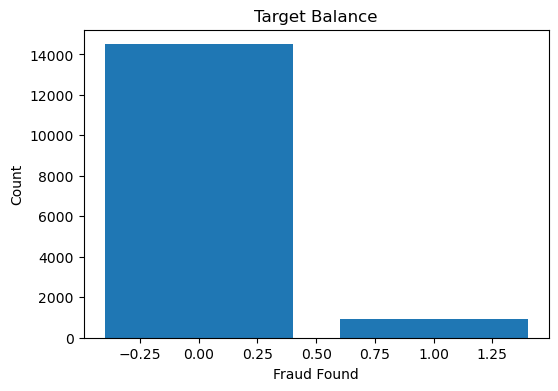

In [8]:
#Visualization 
plt.figure(figsize=(6, 4))
plt.bar(fraud_counts['FraudFound_P'], fraud_counts['Count'])
plt.xlabel('Fraud Found')
plt.ylabel('Count')
plt.title('Target Balance')
plt.show()


In [9]:
df_fraud = data[data['FraudFound_P'] == 1]

- The distribution of the target variable "Fraud_Found_P" is heavily unbalanced.

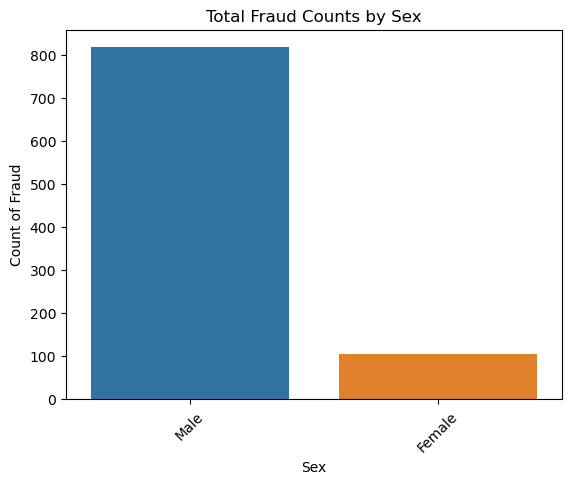

In [10]:
#Fraud Detection by Sex

sns.countplot(data=df_fraud, x='Sex')
plt.title('Total Fraud Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- These findings imply that males are considerably more likely to be associated with detected fraud cases than females.

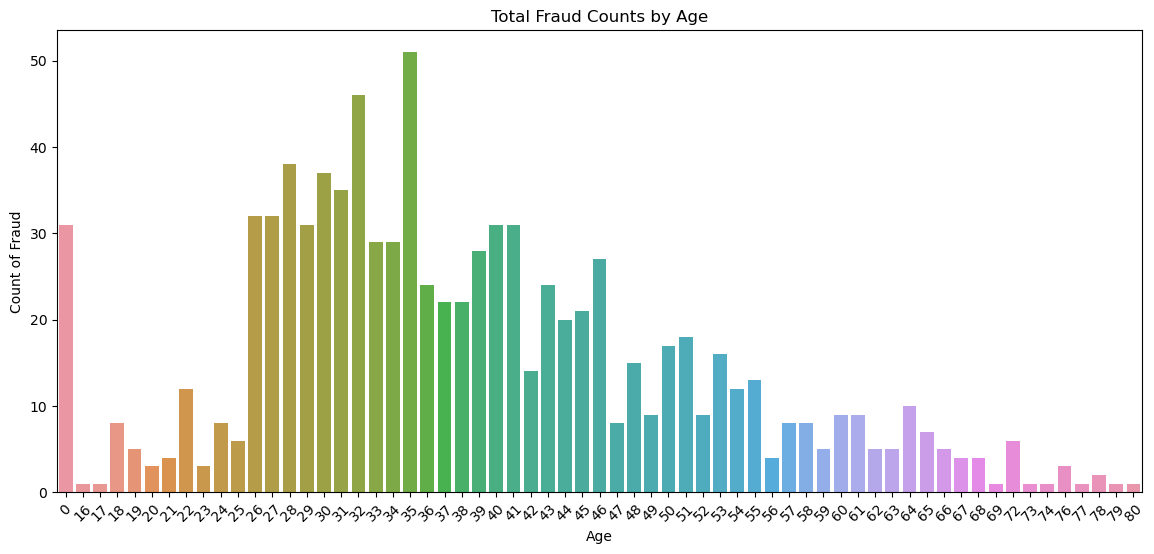

In [11]:
#Fraud Detection by Age 
plt.figure(figsize=(14, 6))
sns.countplot(data=df_fraud, x='Age')
plt.title('Total Fraud Counts by Age')
plt.xlabel('Age')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- Fraud is most commonly found among young adults of ages 25-35 years old.

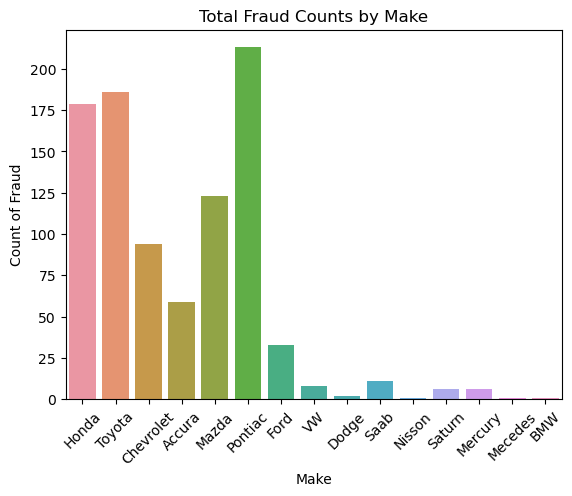

In [12]:
#Fraud Detection by Make

sns.countplot(data=df_fraud, x='Make')
plt.title('Total Fraud Counts by Make')
plt.xlabel('Make')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- Pontiac owners are more likely to be involved in fraud, followed by Toyota and Honda owners. 

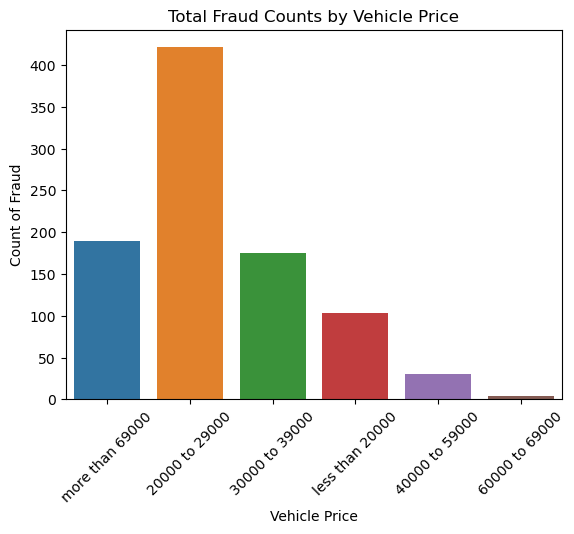

In [13]:
#Fraud Detection by Vehicle Price

sns.countplot(data=df_fraud, x='VehiclePrice')
plt.title('Total Fraud Counts by Vehicle Price')
plt.xlabel('Vehicle Price')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- Fraudulent cases were most frequently detected in the cheapest vehicle categories.

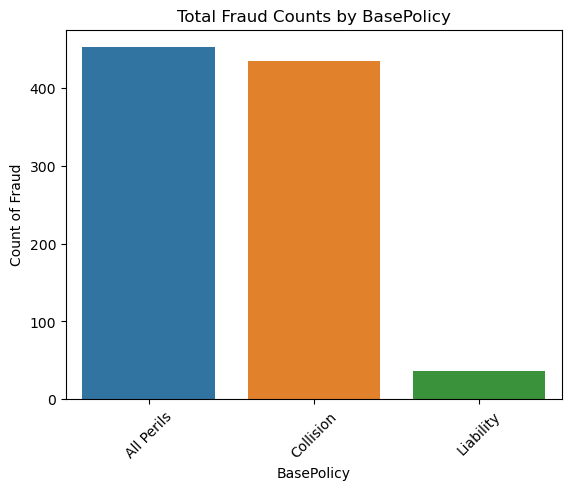

In [14]:
#Fraud Detection by BasePolicy

sns.countplot(data=df_fraud, x='BasePolicy')
plt.title('Total Fraud Counts by BasePolicy')
plt.xlabel('BasePolicy')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- Fraudulent cases were detected most frequently under the "All Perils". 

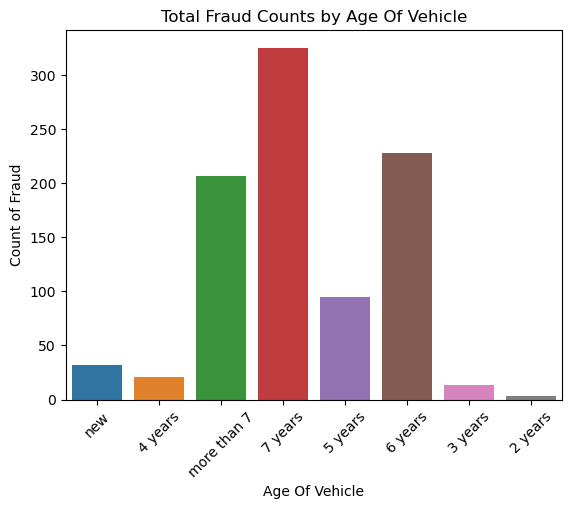

In [15]:
#Fraud Detection by Age of Vehicle

sns.countplot(data=df_fraud, x='AgeOfVehicle')
plt.title('Total Fraud Counts by Age Of Vehicle')
plt.xlabel('Age Of Vehicle')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- The feature "AgeOfVehicle" actually can be re-classified into 3 categories; The higest, mid, and low fraudulent groups.

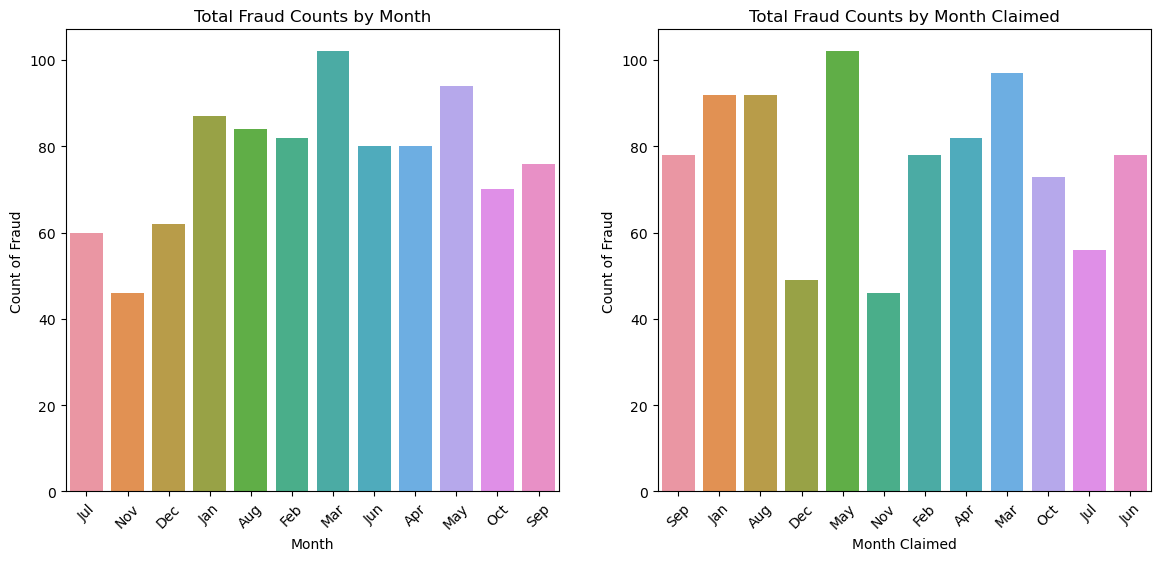

In [16]:
#Fraud Detection by Month

plt.figure(figsize=(14, 6))
# Month
plt.subplot(1, 2, 1)
sns.countplot(data=df_fraud, x='Month')
plt.title('Total Fraud Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)

# MonthClaimed
plt.subplot(1, 2, 2)
sns.countplot(data=df_fraud, x='MonthClaimed')
plt.title('Total Fraud Counts by Month Claimed')
plt.xlabel('Month Claimed')
plt.ylabel('Count of Fraud')
plt.xticks(rotation=45)
plt.show()

- The features have similar distributions. 

🔄03. Data Preprocessing🔄

In [17]:
data.shape

(15420, 33)

In [18]:
#Data Reduction - Drop Useless Columns
#I dropped "Month" because we already have similar feature "MonthClaimed" 
#Also, I dropped other features related to "Date".

In [19]:
useless_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'Deductible', 'MaritalStatus']
data = data.drop(columns=useless_columns, axis=1)
data.shape

(15420, 24)

In [20]:
#Converted all columns to numeric values
le = LabelEncoder()

for col in data.columns:
    if col != 'FraudFound_P':
        data[col] = le.fit_transform(data[col])
        print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping:  {'Accura': 0, 'BMW': 1, 'Chevrolet': 2, 'Dodge': 3, 'Ferrari': 4, 'Ford': 5, 'Honda': 6, 'Jaguar': 7, 'Lexus': 8, 'Mazda': 9, 'Mecedes': 10, 'Mercury': 11, 'Nisson': 12, 'Pontiac': 13, 'Porche': 14, 'Saab': 15, 'Saturn': 16, 'Toyota': 17, 'VW': 18}
Label Mapping:  {'Rural': 0, 'Urban': 1}
Label Mapping:  {'0': 0, 'Apr': 1, 'Aug': 2, 'Dec': 3, 'Feb': 4, 'Jan': 5, 'Jul': 6, 'Jun': 7, 'Mar': 8, 'May': 9, 'Nov': 10, 'Oct': 11, 'Sep': 12}
Label Mapping:  {'Female': 0, 'Male': 1}
Label Mapping:  {0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7, 23: 8, 24: 9, 25: 10, 26: 11, 27: 12, 28: 13, 29: 14, 30: 15, 31: 16, 32: 17, 33: 18, 34: 19, 35: 20, 36: 21, 37: 22, 38: 23, 39: 24, 40: 25, 41: 26, 42: 27, 43: 28, 44: 29, 45: 30, 46: 31, 47: 32, 48: 33, 49: 34, 50: 35, 51: 36, 52: 37, 53: 38, 54: 39, 55: 40, 56: 41, 57: 42, 58: 43, 59: 44, 60: 45, 61: 46, 62: 47, 63: 48, 64: 49, 65: 50, 66: 51, 67: 52, 68: 53, 69: 54, 70: 55, 71: 56, 72: 57, 73: 58, 74: 59, 75: 60, 76: 61, 77:

⚙️04. SMOTE Oversampling - Synthetic Minority Oversampling Technique⚙️

In [21]:
# Train - Test Split
X = data.drop(columns="FraudFound_P")
y = data["FraudFound_P"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After Smote: ", X_train_s.shape, y_train_s.shape)
print()
print("After SMOTE Label Distribution:\n", pd.Series(y_train_s).value_counts())

Before SMOTE:  (12336, 23) (12336,)
After Smote:  (23220, 23) (23220,)

After SMOTE Label Distribution:
 0    11610
1    11610
Name: FraudFound_P, dtype: int64


In [23]:
df_smote = pd.concat([X_train_s, y_train_s], axis=1)
df_smote.shape

(23220, 24)

In [24]:
#Now, we have Balanced Dataset! 

🤖05. Applying ML models 🤖

- Logistic Regression

Logistic Regression Model Metrics:
Accuracy: 0.7250
Precision: 0.1355
Recall: 0.6142
F1 Score: 0.2220

Confusion Matrix for Logistic Regression:
 [[2115  772]
 [  76  121]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


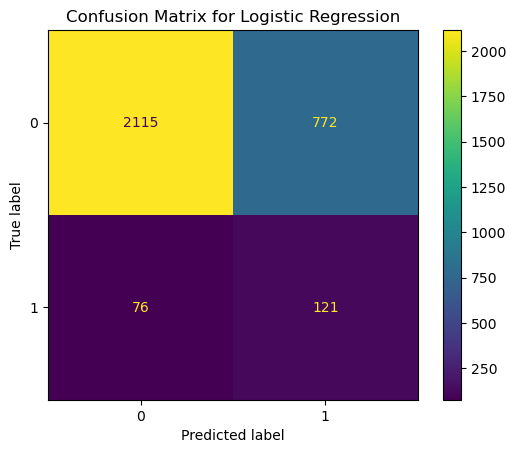

In [25]:
# Logistic Regression model
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train_s, y_train_s)

y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Logistic Regression model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")
print()

# Confusion matrix for logistic regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:\n", cm_logreg)

disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

- Decision Tree Classifier

Decision Tree Classifier Metrics:
Accuracy: 0.8667
Precision: 0.2011
Recall: 0.3655
F1 Score: 0.2595
Confusion Matrix for Decision Tree Classifier:
 [[2601  286]
 [ 125   72]]


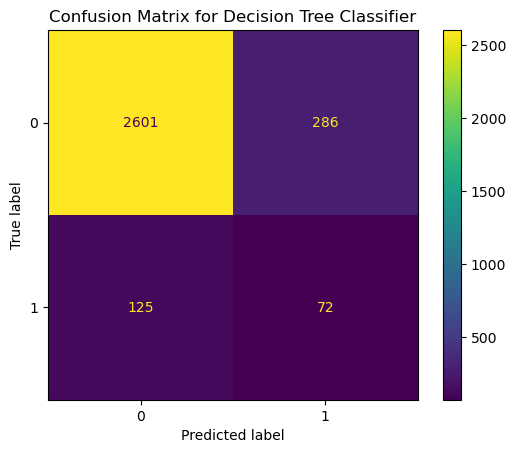

In [26]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier( random_state=42)

dt_model.fit(X_train_s, y_train_s)

y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


# Confusion matrix for decision tree classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Classifier:\n", cm_dt)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

- Random Forest Classifier

Logistic Regression Model Metrics:
Accuracy: 0.8907
Precision: 0.2009
Recall: 0.2386
F1 Score: 0.2181

Confusion Matrix for Random Forest Classifier:
 [[2700  187]
 [ 150   47]]


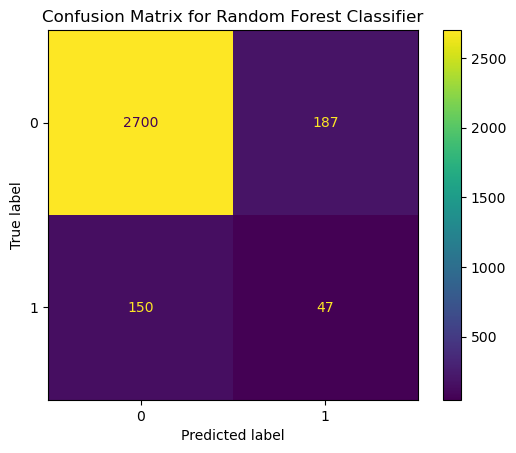

In [27]:
# Random Forest Classifier 
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_s, y_train_s)

y_pred_rf = model_rf.predict(X_test)

# Evaluate Random Forest Classifier model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf  = precision_score(y_test, y_pred_rf)
recall_rf  = recall_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test, y_pred_rf)

print("Logistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_rf :.4f}")
print(f"Precision: {precision_rf :.4f}")
print(f"Recall: {recall_rf :.4f}")
print(f"F1 Score: {f1_rf :.4f}")
print()

# Confusion matrix for Random Forest Classifier
cm_rf  = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier:\n", cm_rf )

disp_rf  = ConfusionMatrixDisplay(confusion_matrix=cm_rf )
disp_rf.plot()
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


- Gradient Boosting Classifier


Gradient Boosting Classifier Metrics:
Accuracy: 0.7918
Precision: 0.1704
Recall: 0.5838
F1 Score: 0.2638
Confusion Matrix for Gradient Boosting Classifier:
 [[2327  560]
 [  82  115]]


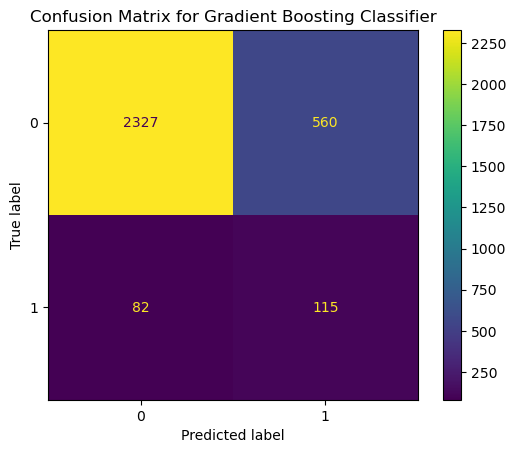

In [28]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train_s, y_train_s)
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("\nGradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")

# Confusion matrix for Gradient Boosting Classifier
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix for Gradient Boosting Classifier:\n", cm_gb)

disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

- Support Vector Classifier


Support Vector Metrics:
Accuracy: 0.7160
Precision: 0.1361
Recall: 0.6447
F1 Score: 0.2248
Confusion Matrix for Support Vector Classifier:
 [[2081  806]
 [  70  127]]


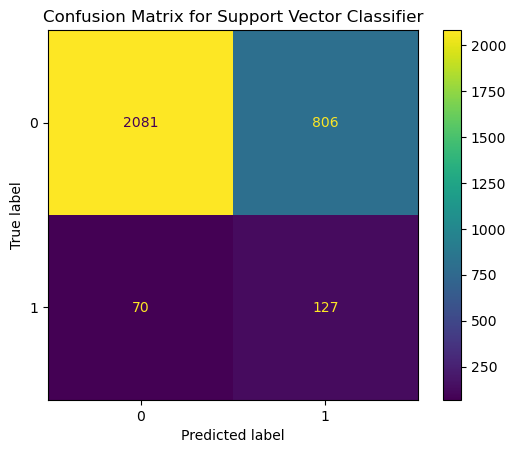

In [29]:
#Support Vector Classifier
model_svc = SVC(kernel='rbf', C=1, gamma='scale')  # 'rbf' for non-linear kernel
model_svc.fit(X_train_s, y_train_s)
y_pred_svc = model_svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print("\nSupport Vector Metrics:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1 Score: {f1_svc:.4f}")

# Confusion matrix for Support Vector Classifier
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for Support Vector Classifier:\n", cm_svc)

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot()
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

- Neural Networks

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5403 - loss: 0.7786 - val_accuracy: 0.8577 - val_loss: 0.3660
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7439 - loss: 0.5194 - val_accuracy: 0.7283 - val_loss: 0.4743
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7933 - loss: 0.4441 - val_accuracy: 0.7169 - val_loss: 0.4797
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4135 - val_accuracy: 0.6900 - val_loss: 0.5065
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.3965 - val_accuracy: 0.7017 - val_loss: 0.4847
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8251 - loss: 0.3860 - val_accuracy: 0.7429 - val_loss: 0.4297
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Metrics:
Accuracy: 0.8577
Precision: 0.1676
Recall: 0.3096
F1 Score: 0.2175


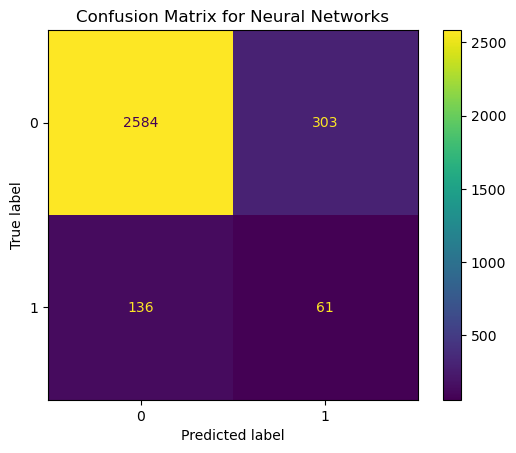

In [30]:
# Neural Network model architecture
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_s.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),                    
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dropout(0.3),          
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=5,          
    verbose=1,            
    restore_best_weights=True 
)

history = nn_model.fit(X_train_s, y_train_s, 
                       epochs=50, 
                       batch_size=64, 
                       validation_data=(X_test, y_test), 
                       callbacks=[early_stopping], 
                       verbose=1)


y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("\nNeural Network Metrics:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")

# Confusion matrix for Neural Networks
cm_nn = confusion_matrix(y_test, y_pred_nn)

disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot()
plt.title("Confusion Matrix for Neural Networks")
plt.show()


- Conclusions

In [31]:
finalreport = { 'Logistic Regression':[accuracy_logreg, precision_logreg, recall_logreg, f1_logreg],
               'Decision Tree Classifier':[accuracy_dt, precision_dt, recall_dt, f1_dt], 
               'Random Forest Classifier':[accuracy_rf, precision_rf, recall_rf, f1_rf],
               'Gradient Boosting Classifier':[accuracy_gb, precision_gb, recall_gb, f1_gb],
               'Support Vector Classifier':[accuracy_svc, precision_svc, recall_svc, f1_svc],
               'Neural Networks':[accuracy_nn, precision_nn, recall_nn, f1_nn],        
               }

Report = pd.DataFrame(finalreport, index = ['Accuracy','Precision','Recall', 'F1 Score'])
Report

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,Support Vector Classifier,Neural Networks
Accuracy,0.725032,0.866732,0.890726,0.791829,0.715953,0.857652
Precision,0.135498,0.201117,0.200855,0.170370,0.136120,0.167582
Recall,0.614213,0.365482,0.238579,0.583756,0.644670,0.309645
F1 Score,0.222018,0.259459,0.218097,0.263761,0.224779,0.217469


Based on the performance metrics of the models evaluated for the Insurance Fraud Claim Detection project, here is a concise conclusion:

Accuracy:
- Random Forest Classifier model has the highest accuracy at 89.07%, suggesting that it makes the correct predictions for the majority of instances.
- Decision Tree Classifier models also performing well with an accuracy of 86.67%, followed by Neural Networks model with an accuracy of 85.76%.
- Support Vector Classifier has the lowest accuracy at 71.59%.

Precision:
- All models exhibit relatively low precision, with the Logistic Regression model performing the worst at 0.1354. This indicates that when the model predicts a positive class, it is often incorrect.
- Random Forest and Decision Tree classifiers show similar precision scores around 0.2008, indicating a somewhat similar rate of false positives.

Recall:
- Support Vector Classifier has the highest recall at 0.6446, indicating that it identifies a large portion of actual positive instances correctly.
- Logistic Regression model also has a decent recall (0.6142), suggesting that it captures a significant number of true positives.
- Random Forest and Decision Tree classifiers have lower recall values (0.2385 and 0.3654, respectively), indicating they are not as effective at identifying all positive instances.

F1 Score:
- Gradient Boosting Classifier has the highest F1 score at 0.2637, closely followed by Decision Tree Classifier (0.2594). These values indicate a better balance between precision and recall compared to the other models.
- Neural Networks model has a lower F1 score (0.2174) despite having a high accuracy, which suggests that its high accuracy may be due to a majority class being predicted rather than actual performance on the minority class.
